# Project 1: SAT & ACT Analysis

The first markdown cell in a notebook is a great place to provide an overview of your entire project. You will likely want to at least state your

## Problem Statement

Define the problem you are finding answers for from the data given.

## Executive Summary

If you want to, it's great to use relative links to direct your audience to various sections of a notebook. **HERE'S A DEMONSTRATION WITH THE CURRENT SECTION HEADERS**:

### Contents:
- [2017 Data Import & Cleaning](#Data-Import-and-Cleaning)
- [2018 Data Import and Cleaning](#2018-Data-Import-and-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Visualization](#Visualize-the-data)
- [Descriptive and Inferential Statistics](#Descriptive-and-Inferential-Statistics)
- [Outside Research](#Outside-Research)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

**If you combine your problem statement, executive summary, data dictionary, and conclusions/recommendations, you have an amazing README.md file that quickly aligns your audience to the contents of your project.** Don't forget to cite your data sources!

*All libraries used should be added here*

In [424]:
#Imports:
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

sns.set_style('whitegrid')

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

## 2017 Data Import and Cleaning

#### 1. Read In SAT & ACT  Data

Read in the `sat_2017.csv` and `act_2017.csv` files and assign them to appropriately named pandas dataframes.

In [425]:
#Code:
sat_2017 = pd.read_csv('../data/sat_2017.csv')
act_2017 = pd.read_csv('../data/act_2017.csv')

#### 2. Display Data

Print the first 10 rows of each dataframe to your jupyter notebook

In [426]:
#Code:
sat_2017[:10]

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,5%,593,572,1165
1,Alaska,38%,547,533,1080
2,Arizona,30%,563,553,1116
3,Arkansas,3%,614,594,1208
4,California,53%,531,524,1055
5,Colorado,11%,606,595,1201
6,Connecticut,100%,530,512,1041
7,Delaware,100%,503,492,996
8,District of Columbia,100%,482,468,950
9,Florida,83%,520,497,1017


In [427]:
act_2017[:10]

,State,Participation,English,Math,Reading,Science,Composite
0,National,60%,20.3,20.7,21.4,21.0,21.0
1,Alabama,100%,18.9,18.4,19.7,19.4,19.2
2,Alaska,65%,18.7,19.8,20.4,19.9,19.8
3,Arizona,62%,18.6,19.8,20.1,19.8,19.7
4,Arkansas,100%,18.9,19.0,19.7,19.5,19.4
5,California,31%,22.5,22.7,23.1,22.2,22.8
6,Colorado,100%,20.1,20.3,21.2,20.9,20.8
7,Connecticut,31%,25.5,24.6,25.6,24.6,25.2
8,Delaware,18%,24.1,23.4,24.8,23.6,24.1
9,District of Columbia,32%,24.4,23.5,24.9,23.5,24.2


In [430]:
# ACT test has an additional row
# Participation is an Object, ACT composite is also Object, they need to be converted to float

In [126]:
sat_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
State                                 51 non-null object
Participation                         51 non-null object
Evidence-Based Reading and Writing    51 non-null int64
Math                                  51 non-null int64
Total                                 51 non-null int64
dtypes: int64(3), object(2)
memory usage: 2.1+ KB


In [127]:
act_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 7 columns):
State            52 non-null object
Participation    52 non-null object
English          52 non-null float64
Math             52 non-null float64
Reading          52 non-null float64
Science          52 non-null float64
Composite        52 non-null object
dtypes: float64(4), object(3)
memory usage: 3.0+ KB


#### 3. Verbally Describe Data

Take your time looking through the data and thoroughly describe the data in the markdown cell below. 

Answer: 

SAT has 2 test componets, while ACT has 4.  ACT test has an additional row - "National"
Participation and Composite needs to be converted to float.

#### 4a. Does the data look complete? 

Answer:Yes

#### 4b. Are there any obvious issues with the observations?

**What is the minimum *possible* value for each test/subtest? What is the maximum *possible* value?**

Consider comparing any questionable values to the sources of your data:
- [SAT](https://blog.collegevine.com/here-are-the-average-sat-scores-by-state/)
- [ACT](https://blog.prepscholar.com/act-scores-by-state-averages-highs-and-lows)

In [433]:
print(act_2017.describe())
print(sat_2017.describe())

         English       Math    Reading    Science
count  52.000000  52.000000  52.000000  52.000000
mean   20.919231  21.173077  22.001923  21.040385
std     2.332132   1.963602   2.048672   3.151113
min    16.300000  18.000000  18.100000   2.300000
25%    19.000000  19.400000  20.475000  19.900000
50%    20.550000  20.900000  21.700000  21.150000
75%    23.300000  23.100000  24.125000  22.525000
max    25.500000  25.300000  26.000000  24.900000
       Evidence-Based Reading and Writing        Math        Total
count                           51.000000   51.000000    51.000000
mean                           569.117647  547.627451  1126.098039
std                             45.666901   84.909119    92.494812
min                            482.000000   52.000000   950.000000
25%                            533.500000  522.000000  1055.500000
50%                            559.000000  548.000000  1107.000000
75%                            613.000000  599.000000  1212.000000
max           

Answer:

ACT: the range of the scores is [1,36] for each of the section, as well as the composite scores.  composite score is the average of the individual tests

SAT: Each test is between [200,800], and the total score is the sum of (EBRW and Maths)

However,

The minimum SAT Math scare is 52, which is outside the range of the SAT score. The state with this value is Maryland, cross-check result shows that it should be 524 

#### 4c. Fix any errors you identified

**The data is available** so there's no need to guess or calculate anything. If you didn't find any errors, continue to the next step.

In [434]:
#code
#sat_2017 = sat_2017.sort_values(by='Math')

#Filter entries that is outside the score range
sat_2017[~sat_2017['Math'].between(200,800)]

,State,Participation,Evidence-Based Reading and Writing,Math,Total
20,Maryland,69%,536,52,1060


In [435]:
sat_2017.loc[sat_2017['State']=='Maryland',['Math']] = 524

sat_2017.loc[sat_2017['State']=='Maryland',['Math']]

,Math
20,524


#### 5. What are your data types? 
Display the data types of each feature. 

In [436]:
print(act_2017.info())
print(sat_2017.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 7 columns):
State            52 non-null object
Participation    52 non-null object
English          52 non-null float64
Math             52 non-null float64
Reading          52 non-null float64
Science          52 non-null float64
Composite        52 non-null object
dtypes: float64(4), object(3)
memory usage: 3.0+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
State                                 51 non-null object
Participation                         51 non-null object
Evidence-Based Reading and Writing    51 non-null int64
Math                                  51 non-null int64
Total                                 51 non-null int64
dtypes: int64(3), object(2)
memory usage: 2.1+ KB
None


What did you learn?
- Do any of them seem odd?  
- Which ones are not as they should be?  

Answer:

act_2017: Composite column is an object, instead of float.
act_2017 and sat_2017: Participation should be float, not object

#### 6. Fix Incorrect Data Types
Based on what you discovered above, use appropriate methods to re-type incorrectly typed data.
- Define a function that will allow you to convert participation rates to an appropriate numeric type. Use `map` or `apply` to change these columns in each dataframe.

In [437]:
act_2017['Participation'].dtype

dtype('O')

In [438]:
# Practice code
# e.g 40%, % is always the last element, so only convert x[0] to the 2nd last element of the string                                              
string = '40%'
string[0:len(string)-1]

'40'

In [439]:
# A lambda function to change the str to float
percentage_to_float = lambda x: float(x[0:len(x)-1]) 

act_2017['Participation']= act_2017['Participation'].apply(percentage_to_float)
sat_2017['Participation']= sat_2017['Participation'].apply(percentage_to_float)

In [440]:
# define the function the long way

#def percentage_to_float(string):
#    output=[]
#    for i in string:
#        output= float(i[0:len(i)-1])
#    return output

#percentage_to_float(act_participation) 

- Fix any individual values preventing other columns from being the appropriate type.

In [441]:
# Find entry that cannot convert to numeric:
# 1. Use .to_numeric() to mark the entry as NaN, 
# 2. Use .isnull() to identify its loc, then ask df[loc]

act_2017[pd.to_numeric(act_2017['Composite'], errors='coerce').isnull()]

#act_2017['Composite'].apply(lambda x:float(x) if x.isnull())

,State,Participation,English,Math,Reading,Science,Composite
51,Wyoming,100.0,19.4,19.8,20.8,20.6,20.2x


In [443]:
act_2017.loc[act_2017["State"]=='Wyoming', 'Composite'] = 20.2  # fix the wrong entry

act_2017['Composite'] = act_2017['Composite'].apply(float)

- Finish your data modifications by making sure the columns are now typed appropriately.

In [444]:
# min, max, and count has to make sense
print(act_2017['Participation'].describe())
print(sat_2017['Participation'].describe())


count     52.000000
mean      65.153846
std       31.832518
min        8.000000
25%       31.000000
50%       68.000000
75%      100.000000
max      100.000000
Name: Participation, dtype: float64
count     51.000000
mean      39.803922
std       35.276632
min        2.000000
25%        4.000000
50%       38.000000
75%       66.000000
max      100.000000
Name: Participation, dtype: float64


- Display the data types again to confirm they are correct.

In [445]:
# Participation data type check
act_2017.info()
sat_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 7 columns):
State            52 non-null object
Participation    52 non-null float64
English          52 non-null float64
Math             52 non-null float64
Reading          52 non-null float64
Science          52 non-null float64
Composite        52 non-null float64
dtypes: float64(6), object(1)
memory usage: 3.0+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
State                                 51 non-null object
Participation                         51 non-null float64
Evidence-Based Reading and Writing    51 non-null int64
Math                                  51 non-null int64
Total                                 51 non-null int64
dtypes: float64(1), int64(3), object(1)
memory usage: 2.1+ KB


#### 7. Rename Columns
Change the names of the columns to more expressive names so that you can tell the difference the SAT columns and the ACT columns. Your solution should map all column names being changed at once (no repeated singular name-changes). **We will be combining these data with some of the data from 2018, and so you should name columns in an appropriate way**.

**Guidelines**:
- Column names should be all lowercase (you will thank yourself when you start pushing data to SQL later in the course)
- Column names should not contain spaces (underscores will suffice--this allows for using the `df.column_name` method to access columns in addition to `df['column_name']`.
- Column names should be unique and informative (the only feature that we actually share between dataframes is the state).

In [446]:
act_2017.columns

Index(['State', 'Participation', 'English', 'Math', 'Reading', 'Science',
       'Composite'],
      dtype='object')

In [141]:
act_2017.columns.drop('State')

Index(['Participation', 'English', 'Math', 'Reading', 'Science', 'Composite'], dtype='object')

In [142]:
# append "_act_2017" to each col
name_act_2017 = ['state'] + [i+'_act_2017' for i in act_2017.columns.drop('State').str.lower()]
name_act_2017

['state',
 'participation_act_2017',
 'english_act_2017',
 'math_act_2017',
 'reading_act_2017',
 'science_act_2017',
 'composite_act_2017']

In [447]:
# append "_sat_2017" to each col
name_sat_2017 = ['state'] + [i+'_sat_2017' for i in sat_2017.columns.drop('State').str.lower()]
name_sat_2017

['state',
 'participation_sat_2017',
 'evidence-based reading and writing_sat_2017',
 'math_sat_2017',
 'total_sat_2017']

In [448]:
act_2017.columns = name_act_2017
sat_2017.columns = name_sat_2017
print(sat_2017.columns)
print(act_2017.columns)

Index(['state', 'participation_sat_2017',
       'evidence-based reading and writing_sat_2017', 'math_sat_2017',
       'total_sat_2017'],
      dtype='object')
Index(['state', 'participation_act_2017', 'english_act_2017', 'math_act_2017',
       'reading_act_2017', 'science_act_2017', 'composite_act_2017'],
      dtype='object')


#### 8. Create a data dictionary

Now that we've fixed our data, and given it appropriate names, let's create a [data dictionary](http://library.ucmerced.edu/node/10249). 

A data dictionary provides a quick overview of features/variables/columns, alongside data types and descriptions. The more descriptive you can be, the more useful this document is.

Example of a Fictional Data Dictionary Entry: 

|Feature|Type|Dataset|Description|
|---|---|---|---|
|**county_pop**|*integer*|2010 census|The population of the county (units in thousands, where 2.5 represents 2500 people).| 
|**per_poverty**|*float*|2010 census|The percent of the county over the age of 18 living below the 200% of official US poverty rate (units percent to two decimal places 98.10 means 98.1%)|

[Here's a quick link to a short guide for formatting markdown in Jupyter notebooks](https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html).

Provided is the skeleton for formatting a markdown table, with columns headers that will help you create a data dictionary to quickly summarize your data, as well as some examples. **This would be a great thing to copy and paste into your custom README for this project.**

|Feature|Type|Dataset|Description|
|---|---|---|---|
|column name|int/float/object|ACT/SAT|This is an example| 


#### 9. Drop unnecessary rows

One of our dataframes contains an extra row. Identify and remove this from the dataframe.

In [449]:
#code

act_2017=act_2017[~(act_2017['state'] == 'National')]

#act_2017.drop(0,axis=0,inplace=True)
act_2017.shape

(51, 7)

#### 10. Merge Dataframes

Join the 2017 ACT and SAT dataframes using the state in each dataframe as the key. Assign this to a new variable.

In [450]:
#Code:
# rename the lengthy col to a shorter name
sat_2017.rename(columns={'evidence-based reading and writing_sat_2017':'ebrw_sat_2017'}, inplace=True)
sat_2017
combined_2017=pd.merge(act_2017,sat_2017,on='state')
combined_2017.head()

,state,participation_act_2017,english_act_2017,math_act_2017,reading_act_2017,science_act_2017,composite_act_2017,participation_sat_2017,ebrw_sat_2017,math_sat_2017,total_sat_2017
0,Alabama,100.0,18.9,18.4,19.7,19.4,19.2,5.0,593,572,1165
1,Alaska,65.0,18.7,19.8,20.4,19.9,19.8,38.0,547,533,1080
2,Arizona,62.0,18.6,19.8,20.1,19.8,19.7,30.0,563,553,1116
3,Arkansas,100.0,18.9,19.0,19.7,19.5,19.4,3.0,614,594,1208
4,California,31.0,22.5,22.7,23.1,22.2,22.8,53.0,531,524,1055


#### 11. Save your cleaned, merged dataframe

Use a relative path to save out your data as `combined_2017.csv`.

In [451]:
#code
combined_2017.to_csv('combined_2017.csv',index=False)

## 2018 Data Import and Cleaning

Links to the 2018 ACT and SAT data are provided in the README. These data live in PDFs, and so you'll get to enjoy practicing some *manual* data collection. Save these data as a CSV in your `data` directory, and import, explore, and clean these data in the same way you did above. **Make sure you comment on your steps so it is clear *why* you are doing each process**.

In [452]:
sat_2018 = pd.read_csv('../data/sat_2018.csv')
act_2018 = pd.read_csv('../data/act_2018_updated.csv')

act_2018.info()

# col dtype looks ok
# no missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 7 columns):
State                            51 non-null object
Percentage of Students Tested    51 non-null int64
Average Composite Score          51 non-null float64
Average English Score            51 non-null float64
Average Math Score               51 non-null float64
Average Reading Score            51 non-null float64
Average Science Score            51 non-null float64
dtypes: float64(5), int64(1), object(1)
memory usage: 2.9+ KB


In [453]:
act_2018.head()

,State,Percentage of Students Tested,Average Composite Score,Average English Score,Average Math Score,Average Reading Score,Average Science Score
0,Alabama,100,19.1,18.9,18.3,19.6,19.0
1,Alaska,33,20.8,19.8,20.6,21.6,20.7
2,Arizona,66,19.2,18.2,19.4,19.5,19.2
3,Arkansas,100,19.4,19.1,18.9,19.7,19.4
4,California,27,22.7,22.5,22.5,23.0,22.1


In [454]:
# rename the cols
act_2018.columns =['state','participation_act_2018','composite_act_2018','english_act_2018','math_act_2018','reading_act_2018','science_act_2018']
act_2018.head(2)

,state,participation_act_2018,composite_act_2018,english_act_2018,math_act_2018,reading_act_2018,science_act_2018
0,Alabama,100,19.1,18.9,18.3,19.6,19.0
1,Alaska,33,20.8,19.8,20.6,21.6,20.7


In [455]:
act_2018.describe()

# Observation:
# min and max values of the tests are within the range of (1,36)
# participation rate range is normal

,participation_act_2018,composite_act_2018,english_act_2018,math_act_2018,reading_act_2018,science_act_2018
count,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000
mean,61.647059,21.486275,20.988235,21.125490,22.015686,21.345098
std,34.080976,2.106278,2.446356,2.035765,2.167245,1.870114
min,7.000000,17.700000,16.600000,17.800000,18.000000,17.900000
25%,28.500000,19.950000,19.100000,19.400000,20.450000,19.850000
50%,66.000000,21.300000,20.200000,20.700000,21.600000,21.100000
75%,100.000000,23.550000,23.700000,23.150000,24.100000,23.050000
max,100.000000,25.600000,26.000000,25.200000,26.100000,24.900000


In [171]:
sat_2018.head()

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,6%,595,571,1166
1,Alaska,43%,562,544,1106
2,Arizona,29%,577,572,1149
3,Arkansas,5%,592,576,1169
4,California,60%,540,536,1076


In [457]:
# rename cols
sat_2018.columns =['state','participation_sat_2018','ebrw_sat_2018','math_sat_2018','total_sat_2018']
sat_2018.head(2)

,state,participation_sat_2018,ebrw_sat_2018,math_sat_2018,total_sat_2018
0,Alabama,6%,595,571,1166
1,Alaska,43%,562,544,1106


In [458]:
sat_2018.info()

# Observation:
# No missing values, 
# col dtypes looks alright, except participation

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
state                     51 non-null object
participation_sat_2018    51 non-null object
ebrw_sat_2018             51 non-null int64
math_sat_2018             51 non-null int64
total_sat_2018            51 non-null int64
dtypes: int64(3), object(2)
memory usage: 2.1+ KB


In [459]:
# convert participation col to float
sat_2018['participation_sat_2018'] = sat_2018['participation_sat_2018'].apply(percentage_to_float)

sat_2018.describe()
# min and max values of the tests are within the range of (200,800)
# participation rate range is normal

,participation_sat_2018,ebrw_sat_2018,math_sat_2018,total_sat_2018
count,51.000000,51.000000,51.000000,51.000000
mean,45.745098,563.686275,556.235294,1120.019608
std,37.314256,47.502627,47.772623,94.155083
min,2.000000,480.000000,480.000000,977.000000
25%,4.500000,534.500000,522.500000,1057.500000
50%,52.000000,552.000000,544.000000,1098.000000
75%,77.500000,610.500000,593.500000,1204.000000
max,100.000000,643.000000,655.000000,1298.000000


#### Combine your 2017 and 2018 data into a single dataframe
Joining on state names should work, assuming you formatted all your state names identically. Make sure none of your columns (other than state) have identical names. Do yourself a favor and decide if you're encoding participation rates as floats or integers and standardize this across your datasets.

Save the contents of this merged dataframe as `final.csv`.

**Use this combined dataframe for the remainder of the project**.

In [460]:
# Join 2018's ACT and SAT  
combined_2018=pd.merge(act_2018,sat_2018,on='state')
combined_2018.head()

,state,participation_act_2018,composite_act_2018,english_act_2018,math_act_2018,reading_act_2018,science_act_2018,participation_sat_2018,ebrw_sat_2018,math_sat_2018,total_sat_2018
0,Alabama,100,19.1,18.9,18.3,19.6,19.0,6.0,595,571,1166
1,Alaska,33,20.8,19.8,20.6,21.6,20.7,43.0,562,544,1106
2,Arizona,66,19.2,18.2,19.4,19.5,19.2,29.0,577,572,1149
3,Arkansas,100,19.4,19.1,18.9,19.7,19.4,5.0,592,576,1169
4,California,27,22.7,22.5,22.5,23.0,22.1,60.0,540,536,1076


In [461]:
final=pd.merge(combined_2017,combined_2018,on='state')
final.shape

(51, 21)

In [462]:
final.columns

Index(['state', 'participation_act_2017', 'english_act_2017', 'math_act_2017',
       'reading_act_2017', 'science_act_2017', 'composite_act_2017',
       'participation_sat_2017', 'ebrw_sat_2017', 'math_sat_2017',
       'total_sat_2017', 'participation_act_2018', 'composite_act_2018',
       'english_act_2018', 'math_act_2018', 'reading_act_2018',
       'science_act_2018', 'participation_sat_2018', 'ebrw_sat_2018',
       'math_sat_2018', 'total_sat_2018'],
      dtype='object')

In [463]:
final.to_csv('final.csv',index=False)

## Exploratory Data Analysis


### Summary Statistics
Transpose the output of pandas `describe` method to create a quick overview of each numeric feature.

In [464]:
#Code:
final.describe().T

,count,mean,std,min,25%,50%,75%,max
participation_act_2017,51.0,65.254902,32.140842,8.0,31.00,69.0,100.00,100.0
english_act_2017,51.0,20.931373,2.353677,16.3,19.00,20.7,23.30,25.5
math_act_2017,51.0,21.182353,1.981989,18.0,19.40,20.9,23.10,25.3
reading_act_2017,51.0,22.013725,2.067271,18.1,20.45,21.8,24.15,26.0
science_act_2017,51.0,21.041176,3.182463,2.3,19.90,21.3,22.75,24.9
composite_act_2017,51.0,21.519608,2.020695,17.8,19.80,21.4,23.60,25.5
participation_sat_2017,51.0,39.803922,35.276632,2.0,4.00,38.0,66.00,100.0
ebrw_sat_2017,51.0,569.117647,45.666901,482.0,533.50,559.0,613.00,644.0
math_sat_2017,51.0,556.882353,47.121395,468.0,523.50,548.0,599.00,651.0
total_sat_2017,51.0,1126.098039,92.494812,950.0,1055.50,1107.0,1212.00,1295.0


#### Manually calculate standard deviation

$$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

- Write a function to calculate standard deviation using the formula above

In [465]:
# practice code
#data = [1, 2, 3, 4, 5, 6]
#t= [(x-1)**2 for x in data]
#sum(t)
#t

In [466]:
#code
def std_dev(data):
    diff_sq = []
    n= len(data)
    mean = np.mean(data)
    
    diff_sq = [(x-mean)**2 for x in data]
    sigma = (sum(diff_sq)/n)**0.5
    return sigma

- Use a **dictionary comprehension** to apply your standard deviation function to each numeric column in the dataframe.  **No loops**  
- Assign the output to variable `sd` as a dictionary where: 
    - Each column name is now a key 
    - That standard deviation of the column is the value 
     
*Example Output :* `{'ACT_Math': 120, 'ACT_Reading': 120, ...}`

In [467]:
#Code:

#  Use loop
#for col in final.columns[1:]:
#    print(col)
#    print(std_dev(final[col]))

sd = {col:std_dev(final[col]) for col in final.columns[1:]}
sd

{'participation_act_2017': 31.824175751231806,
 'english_act_2017': 2.3304876369363363,
 'math_act_2017': 1.9624620273436781,
 'reading_act_2017': 2.0469029314842646,
 'science_act_2017': 3.151107895464408,
 'composite_act_2017': 2.000786081581989,
 'participation_sat_2017': 34.92907076664508,
 'ebrw_sat_2017': 45.21697020437866,
 'math_sat_2017': 46.65713364485503,
 'total_sat_2017': 91.58351056778743,
 'participation_act_2018': 33.745194881997506,
 'composite_act_2018': 2.0855261815801147,
 'english_act_2018': 2.4222536143202795,
 'math_act_2018': 2.015707255555717,
 'reading_act_2018': 2.145891884510421,
 'science_act_2018': 1.8516885484833543,
 'participation_sat_2018': 36.946619223539415,
 'ebrw_sat_2018': 47.03460978357609,
 'math_sat_2018': 47.30194550378352,
 'total_sat_2018': 93.22742384464433}

In [468]:
np.std(final,axis=0)

participation_act_2017    31.824176
english_act_2017           2.330488
math_act_2017              1.962462
reading_act_2017           2.046903
science_act_2017           3.151108
composite_act_2017         2.000786
participation_sat_2017    34.929071
ebrw_sat_2017             45.216970
math_sat_2017             46.657134
total_sat_2017            91.583511
participation_act_2018    33.745195
composite_act_2018         2.085526
english_act_2018           2.422254
math_act_2018              2.015707
reading_act_2018           2.145892
science_act_2018           1.851689
participation_sat_2018    36.946619
ebrw_sat_2018             47.034610
math_sat_2018             47.301946
total_sat_2018            93.227424
dtype: float64

Do your manually calculated standard deviations match up with the output from pandas `describe`? What about numpy's `std` method?

Answer: Yes, it's quite closely matched

#### Investigate trends in the data
Using sorting and/or masking (along with the `.head` method to not print our entire dataframe), consider the following questions:

- Which states have the highest and lowest participation rates for the:
    - 2017 SAT?
    - 2018 SAT?
    - 2017 ACT?
    - 2018 ACT?
- Which states have the highest and lowest mean total/composite scores for the:
    - 2017 SAT?
    - 2018 SAT?
    - 2017 ACT?
    - 2018 ACT?
- Do any states with 100% participation on a given test have a rate change year-to-year?
- Do any states show have >50% participation on *both* tests either year?

Based on what you've just observed, have you identified any states that you're especially interested in? **Make a note of these and state *why* you think they're interesting**.

**You should comment on your findings at each step in a markdown cell below your code block**. Make sure you include at least one example of sorting your dataframe by a column, and one example of using boolean filtering (i.e., masking) to select a subset of the dataframe.

In [505]:
#code
#final.sort_values(by='participation_act_2017').head()
#final[final['participation_act_2017']==100.0]

#final.sort_values(by='participation_act_2018').head()
final[final['participation_act_2018']==100.0]['state'] 

#final.sort_values(by='participation_sat_2017').head()[['state','participation_sat_2017']]
#final[final['participation_sat_2017']==100.0]['state']

0            Alabama
3           Arkansas
17          Kentucky
18         Louisiana
24       Mississippi
25          Missouri
26           Montana
27          Nebraska
28            Nevada
33    North Carolina
35              Ohio
36          Oklahoma
40    South Carolina
42         Tennessee
44              Utah
49         Wisconsin
50           Wyoming
Name: state, dtype: object

Above is the list of states of 100% rate

In [506]:
# Show states with Lowest SAT participating rate (less than 20%) but high ACT participating rate (>50%).

final[ (final['participation_sat_2018']<20) & (final['participation_act_2018'] >50) ][['state','participation_sat_2018','participation_act_2018']]

,state,participation_sat_2018,participation_act_2018
0,Alabama,6.0,100
3,Arkansas,5.0,100
15,Iowa,3.0,68
16,Kansas,4.0,71
17,Kentucky,4.0,100
18,Louisiana,4.0,100
23,Minnesota,4.0,99
24,Mississippi,3.0,100
25,Missouri,4.0,100
26,Montana,10.0,100


Iowa (68%), Kansas (71%), Minnesota (99%), New Mexico (67%), and South Dakota (77%) seems intertesting
all the states above do not belong to those with mandated ACT.

North Dakota (98%): according to https://www.testive.com/state-sat-act/, North Dakota requires ACT in 2018, so don't need to consider

In [245]:
final[final['participation_sat_2018']==100.0][['state','participation_sat_2018']]

# totally 5 states have 100% participation in SAT 2018

,state,participation_sat_2018
5,Colorado,100.0
6,Connecticut,100.0
7,Delaware,100.0
12,Idaho,100.0
22,Michigan,100.0


In [488]:
# Show states with declining participation rate from 100% on ACT
final[(final['participation_act_2017']==100.0)&(final['participation_act_2018']!=100)][['state','participation_act_2017','participation_act_2018']]

# Colorado has mandated SAT in her state in April 2017, not surprising to see the significant drop in ACT.

,state,participation_act_2017,participation_act_2018
5,Colorado,100.0,30
23,Minnesota,100.0,99


In [508]:
# create new col to look at participation rate change over the year on SAT test
final['sat_participation_rate_change'] = final['participation_sat_2017'] - final['participation_sat_2018']
final.sort_values(by='sat_participation_rate_change', ascending=False).head()

,state,participation_act_2017,english_act_2017,math_act_2017,reading_act_2017,science_act_2017,composite_act_2017,participation_sat_2017,ebrw_sat_2017,math_sat_2017,...,composite_act_2018,english_act_2018,math_act_2018,reading_act_2018,science_act_2018,participation_sat_2018,ebrw_sat_2018,math_sat_2018,total_sat_2018,sat_participation_rate_change
9,Florida,73.0,19.0,19.4,21.0,19.4,19.8,83.0,520,497,...,19.9,19.2,19.3,21.1,19.5,56.0,550,549,1099,27.0
8,District of Columbia,32.0,24.4,23.5,24.9,23.5,24.2,100.0,482,468,...,23.6,23.7,22.7,24.4,23.0,92.0,497,480,977,8.0
28,Nevada,100.0,16.3,18.0,18.1,18.2,17.8,26.0,563,553,...,17.7,16.6,17.8,18.0,17.9,23.0,574,566,1140,3.0
2,Arizona,62.0,18.6,19.8,20.1,19.8,19.7,30.0,563,553,...,19.2,18.2,19.4,19.5,19.2,29.0,577,572,1149,1.0
50,Wyoming,100.0,19.4,19.8,20.8,20.6,20.2,3.0,626,604,...,20.0,19.0,19.7,20.6,20.3,3.0,633,625,1257,0.0


In [507]:
# create new col to look at participation rate change over the year on SAT test
final['sat_participation_rate_change'] = final['participation_sat_2017'] - final['participation_sat_2018']
final.sort_values(by='sat_participation_rate_change', ascending=True).head()

,state,participation_act_2017,english_act_2017,math_act_2017,reading_act_2017,science_act_2017,composite_act_2017,participation_sat_2017,ebrw_sat_2017,math_sat_2017,...,composite_act_2018,english_act_2018,math_act_2018,reading_act_2018,science_act_2018,participation_sat_2018,ebrw_sat_2018,math_sat_2018,total_sat_2018,sat_participation_rate_change
13,Illinois,93.0,21.0,21.2,21.6,21.3,21.4,9.0,559,556,...,23.9,24.1,23.4,24.2,23.4,99.0,513,506,1019,-90.0
5,Colorado,100.0,20.1,20.3,21.2,20.9,20.8,11.0,606,595,...,23.9,23.9,23.2,24.4,23.5,100.0,519,506,1025,-89.0
39,Rhode Island,21.0,24.0,23.3,24.7,23.4,24.0,71.0,539,524,...,24.2,24.4,23.6,25.0,23.5,97.0,513,505,1018,-26.0
48,West Virginia,69.0,20.0,19.4,21.2,20.5,20.4,14.0,558,528,...,20.3,19.8,19.4,21.3,20.4,28.0,513,486,999,-14.0
32,New York,31.0,23.8,24.0,24.6,23.9,24.2,67.0,528,523,...,24.5,24.2,24.2,24.9,24.2,79.0,534,534,1068,-12.0


SAT Participation - Declined
    Florida's SAT participation rate dropped by 23%, its ACT participation rate dropped too ()
    DC by 8% (from 100% to 92%), SAT is not compulsory though.
    Nevada by 3% (Nevada is one of the lowest participated state for SAT anyway, because ACT is mandated)
SAT Participation - Increased
    Illinois: huge jump, to 100%
    Colorado: hug jump to 100%
    Rhode Island: from 71% to 97%
    West Virginia: increased from 14% to 28% (doubled)

In [475]:
# Show states with declining participation rate from 100% on SAT test
final[(final['participation_sat_2017']==100.0)&(final['participation_sat_2018']!=100)][['state','participation_sat_2017','participation_sat_2018']]

,state,participation_sat_2017,participation_sat_2018
8,District of Columbia,100.0,92.0


## Visualize the data

There's not a magic bullet recommendation for the right number of plots to understand a given dataset, but visualizing your data is *always* a good idea. Not only does it allow you to quickly convey your findings (even if you have a non-technical audience), it will often reveal trends in your data that escaped you when you were looking only at numbers.

Some recommendations on plotting:
- Plots have titles
- Plots have axis labels
- Plots have appropriate tick labels
- All text is legible in a plot
- Plots demonstrate meaningful and valid relationships
- Plots are interpreted to aid understanding

There is such a thing as too many plots, and there are a *lot* of bad plots. You might make some! (But hopefully not with the guided prompts below).

#### Use Seaborn's heatmap with pandas `.corr()` to visualize correlations between all numeric features

Heatmaps are generally not appropriate for presentations, and should often be excluded from reports as they can be visually overwhelming. **However**, they can be extremely useful in identify relationships of potential interest (as well as identifying potential collinearity before modeling).

*example*:
```python
sns.heatmap(df.corr())
```

Please take time to format your output, adding a title. Look through some of the additional arguments and options. (Axis labels aren't really necessary, as long as the title is informative).

In [354]:
# Set up mask to be "True" in the upper triangle.
mask = np.zeros_like(final.corr())
mask[np.triu_indices_from(mask)] = True


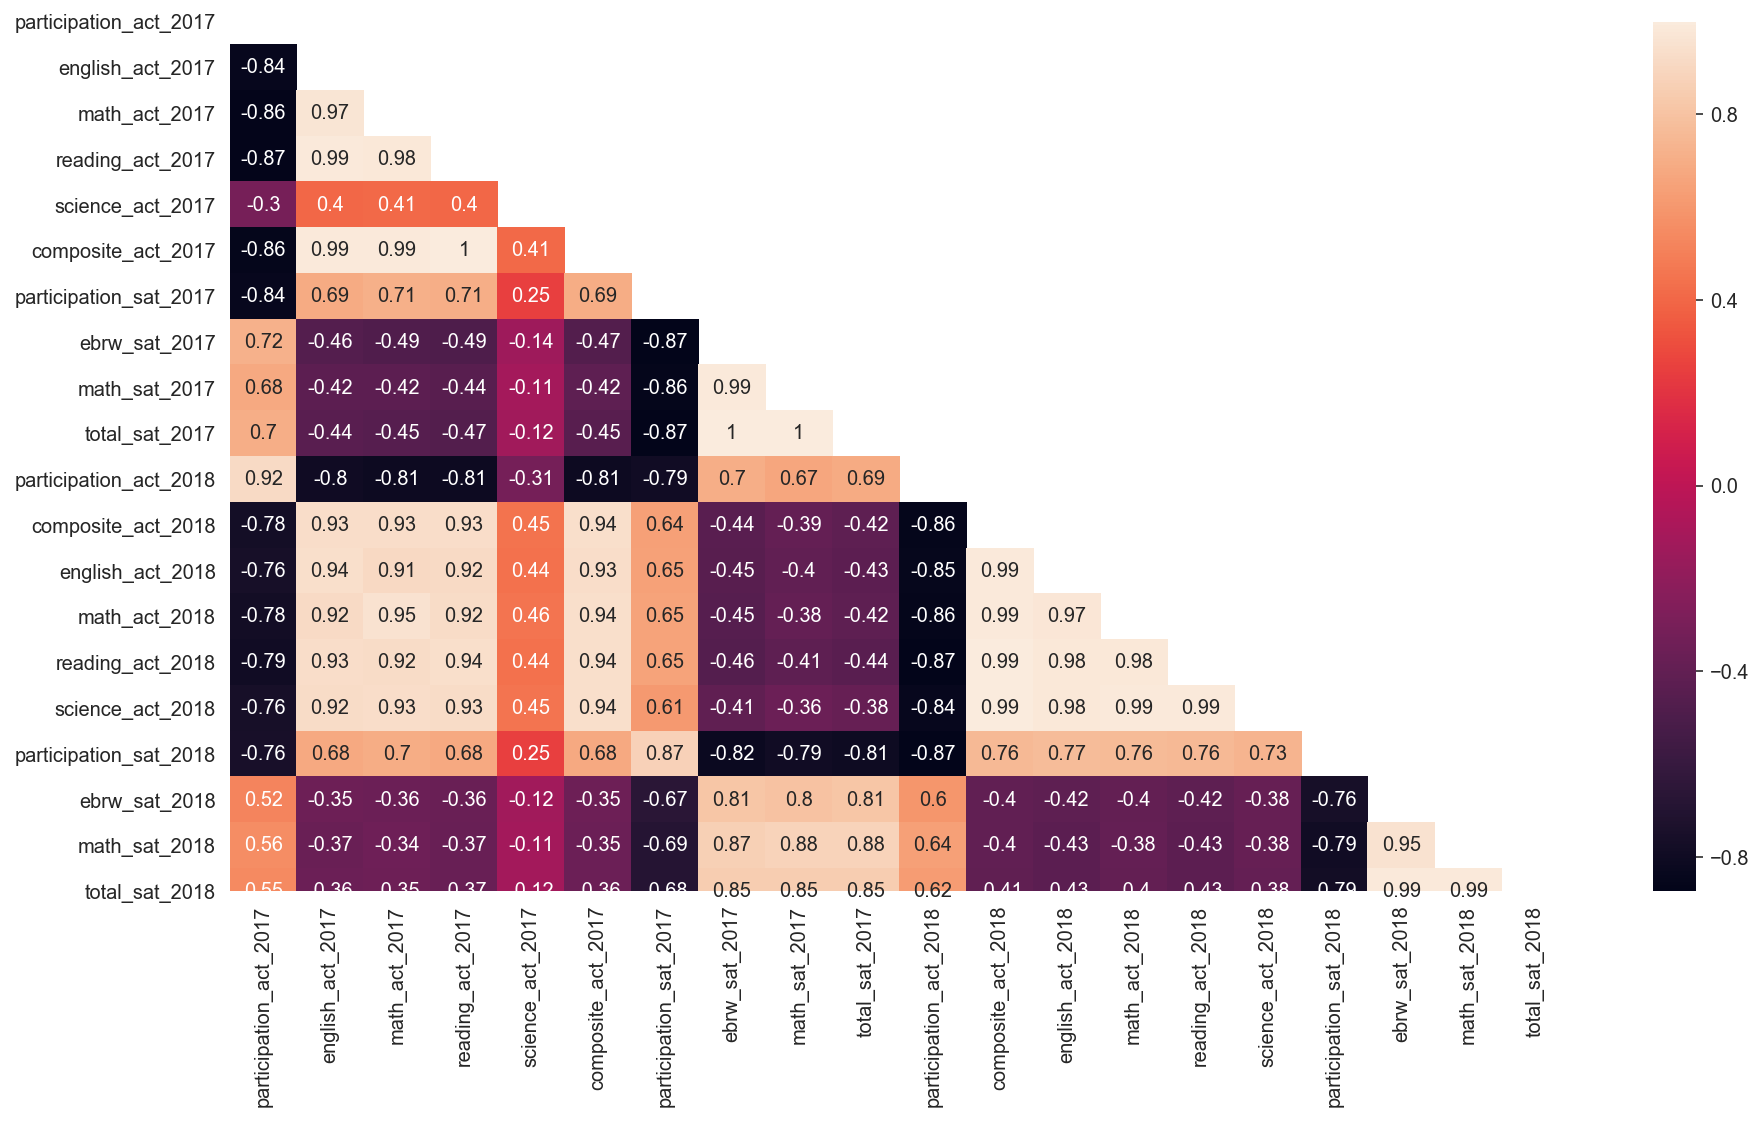

In [355]:
fig, ax = plt.subplots(figsize=(15,8))
sns.heatmap(final.corr(),mask=mask,annot=True)

#### Define a custom function to subplot histograms

We have data for two tests for two years. We only have composite (and not subtest scores) for the 2018 ACT. We should write a function that will take the names of 2+ columns and subplot histograms. While you can use pandas plotting or Seaborn here, matplotlib gives you greater control over all aspects of your plots.

[Helpful Link for Plotting Multiple Figures](https://matplotlib.org/users/pyplot_tutorial.html#working-with-multiple-figures-and-axes)

Here's some starter code:

In [277]:
def subplot_histograms(dataframe, list_of_columns, list_of_titles, list_of_xlabels):
    nrows = int(np.ceil(len(list_of_columns)/2)) # Makes sure you have enough rows
    fig, ax = plt.subplots(nrows=nrows, ncols=2, figsize=(12,10)) # You'll want to specify your figsize
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
    for i, column in enumerate(list_of_columns): # Gives us an index value to get into all our lists
        ax[i].hist(dataframe[column]) # feel free to add more settings
        ax[i].set_title(list_of_titles[i])
        ax[i].set_xlabel(list_of_xlabels[i])
        # Set titles, labels, etc here for each subplot

#### Plot and interpret histograms 
For each of the following:
- Participation rates for SAT & ACT
- Math scores for SAT & ACT
- Reading/verbal scores for SAT & ACT

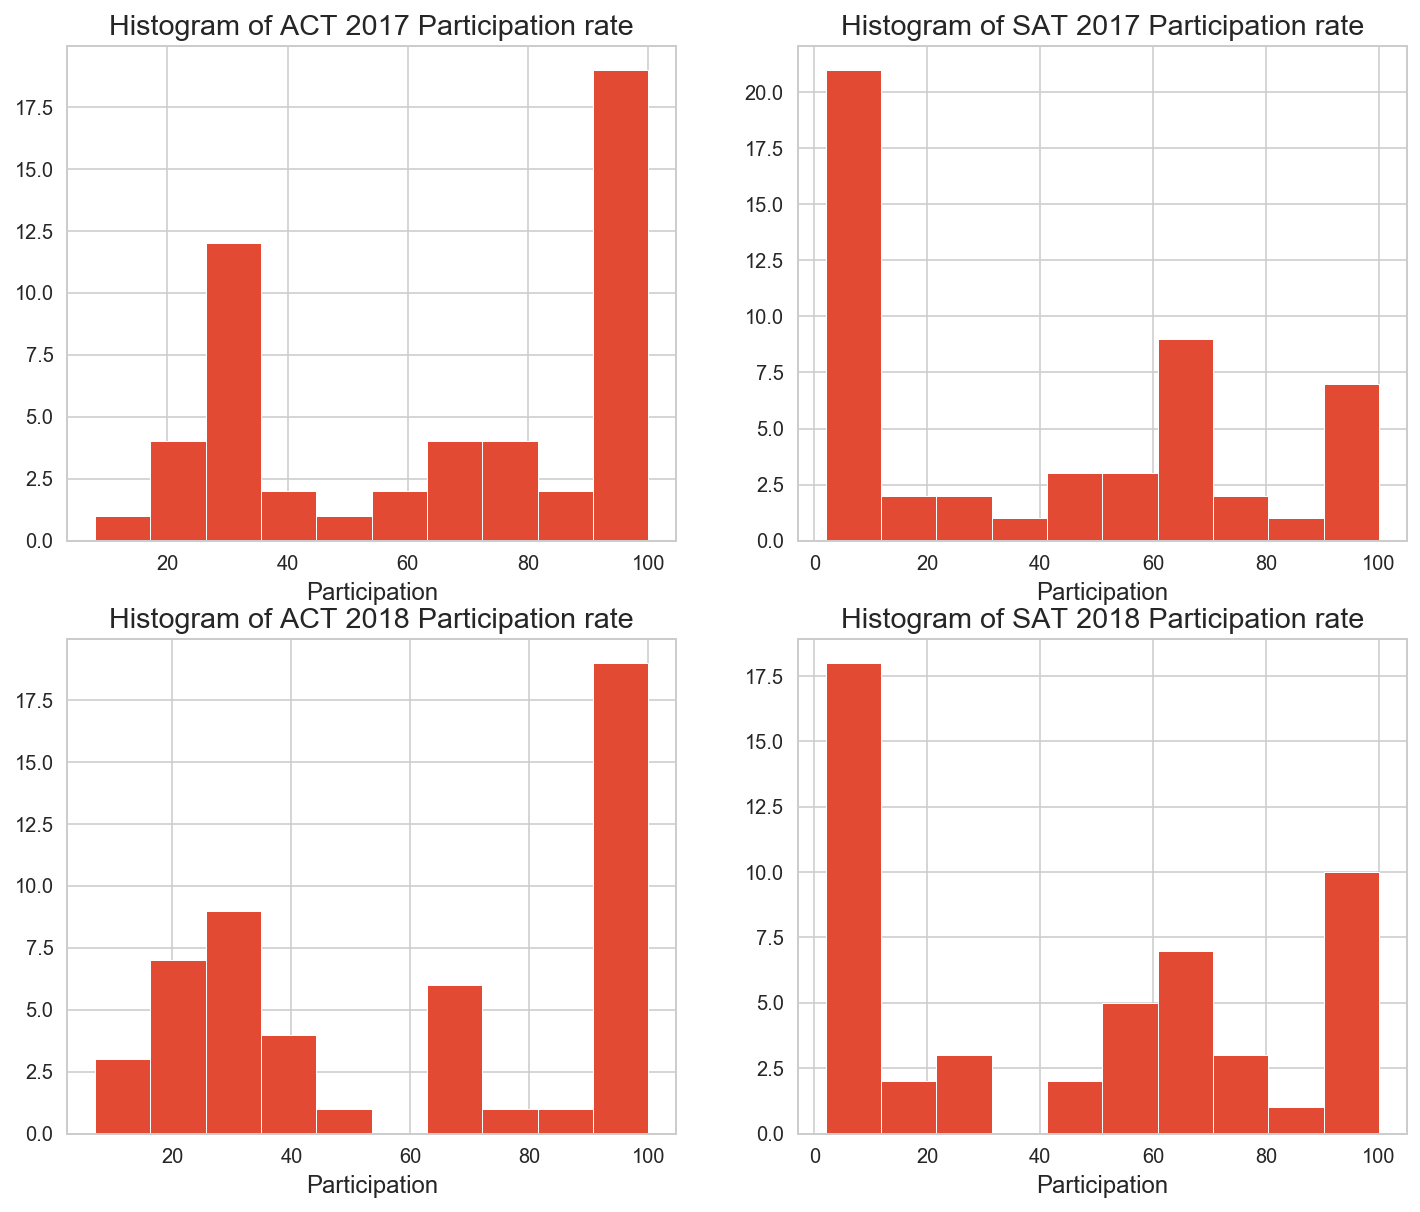

In [509]:
# Code
# Participation rate
subplot_histograms(final, 
                   ['participation_act_2017','participation_sat_2017', 'participation_act_2018','participation_sat_2018'],
                   ['Histogram of ACT 2017 Participation rate', 'Histogram of SAT 2017 Participation rate','Histogram of ACT 2018 Participation rate', 'Histogram of SAT 2018 Participation rate' ],
                   ['Participation', 'Participation','Participation', 'Participation'])
plt.savefig('participation_dist.png')

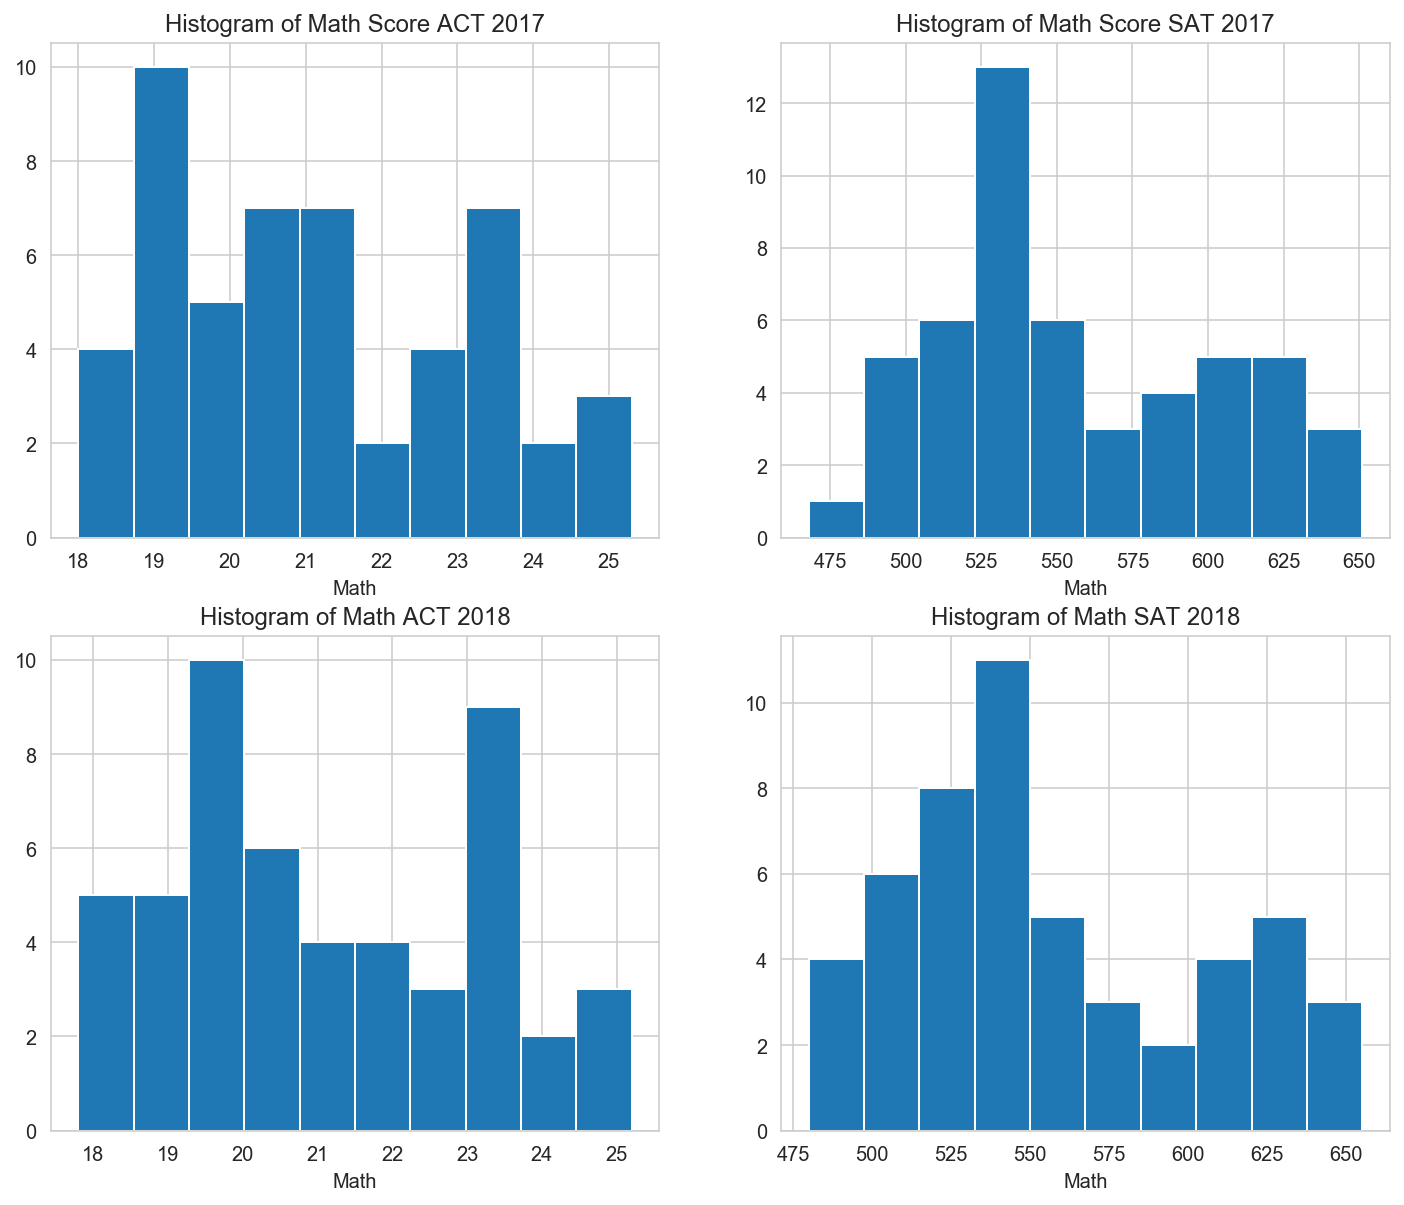

In [279]:
# Code
# Math
subplot_histograms(final, 
                   ['math_act_2017','math_sat_2017','math_act_2018','math_sat_2018'],
                   ['Histogram of Math Score ACT 2017', 'Histogram of Math Score SAT 2017','Histogram of Math ACT 2018', 'Histogram of Math SAT 2018' ],
                   ['Math', 'Math','Math', 'Math'])

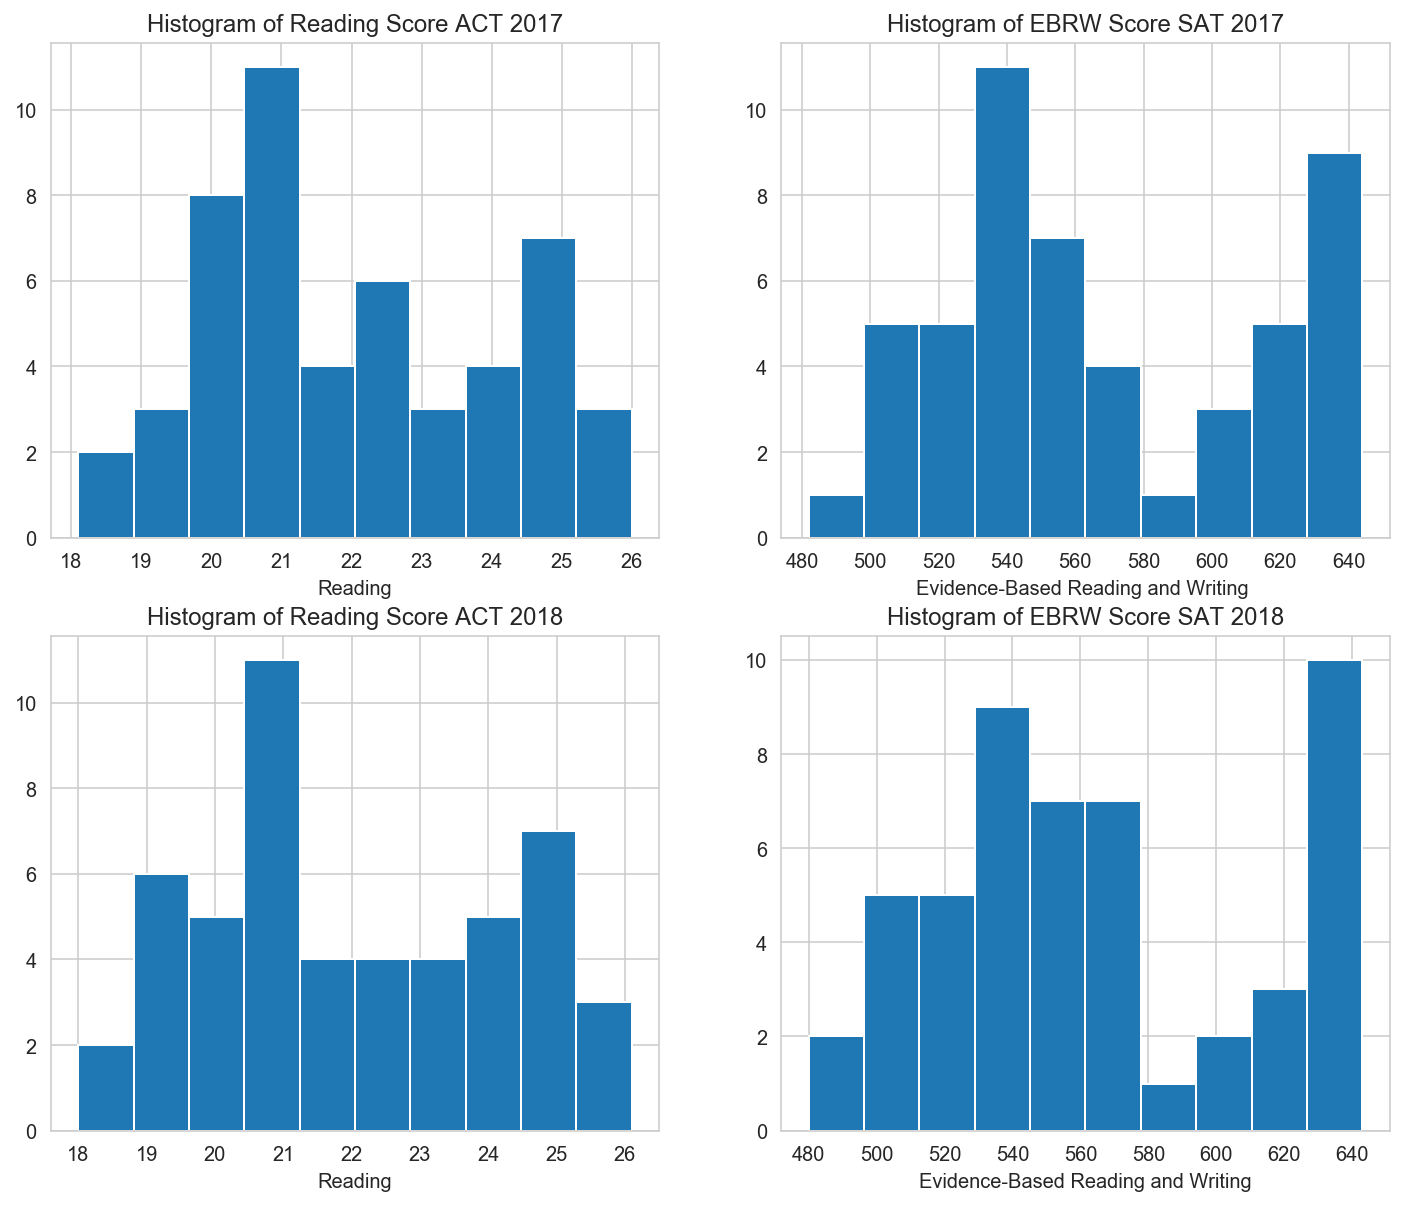

In [281]:
# reading_act_2018

# Code
# reading_act and ebrw_sat
subplot_histograms(final, 
                   ['reading_act_2017','ebrw_sat_2017','reading_act_2018','ebrw_sat_2018'],
                   ['Histogram of Reading Score ACT 2017', 'Histogram of EBRW Score SAT 2017','Histogram of Reading Score ACT 2018', 'Histogram of EBRW Score SAT 2018' ],
                   ['Reading', 'Evidence-Based Reading and Writing ','Reading', 'Evidence-Based Reading and Writing'])

#### Plot and interpret scatter plots

For each of the following:
- SAT vs. ACT math scores for 2017
- SAT vs. ACT verbal/reading scores for 2017
- SAT vs. ACT total/composite scores for 2017
- Total scores for SAT 2017 vs. 2018
- Composite scores for ACT 2017 vs. 2018

Plot the two variables against each other using matplotlib or Seaborn

Your plots should show:
- Two clearly labeled axes
- A proper title
- Using colors and symbols that are clear and unmistakable

**Feel free to write a custom function, and subplot if you'd like.** Functions save both time and space.


Text(0, 0.5, 'SAT Maths')

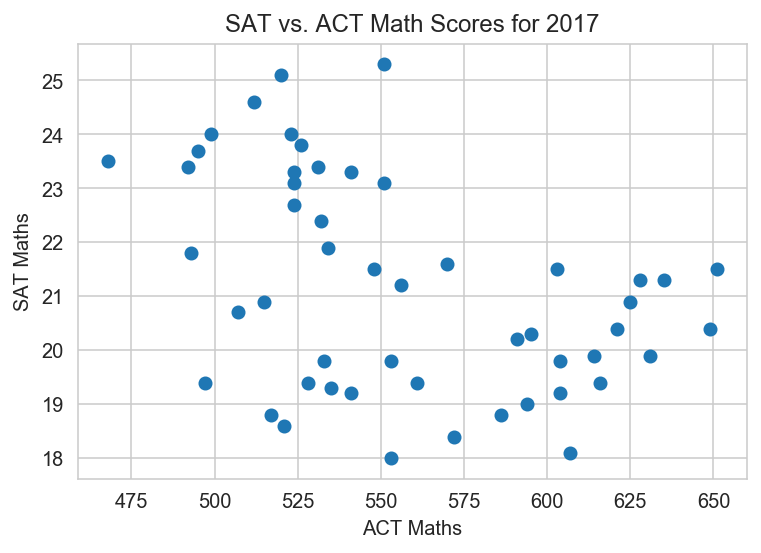

In [287]:
# Code
plt.scatter(final['math_sat_2017'],final['math_act_2017'])
plt.title('SAT vs. ACT Math Scores for 2017')
plt.xlabel('SAT Maths')
plt.ylabel('ACT Maths')

Text(0, 0.5, 'ACT Reading scores')

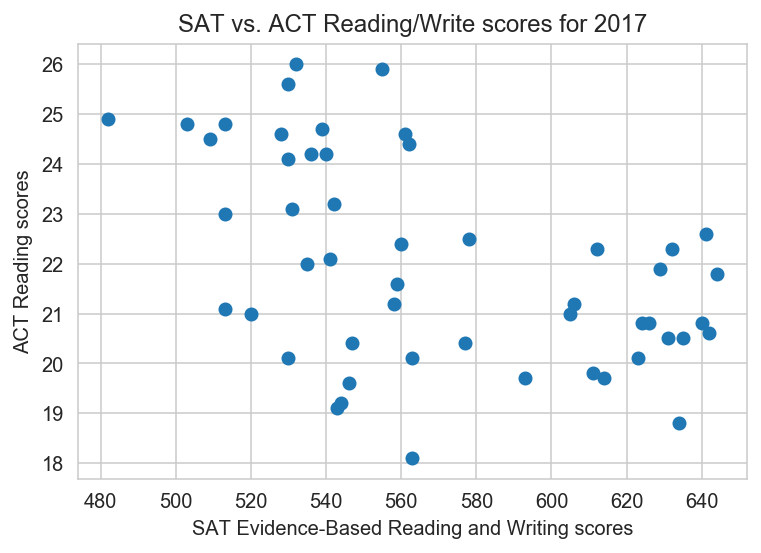

In [290]:
# Code
plt.scatter(final['ebrw_sat_2017'],final['reading_act_2017'])
plt.title('SAT vs. ACT Reading/Write scores for 2017')
plt.xlabel('SAT Evidence-Based Reading and Writing scores')
plt.ylabel('ACT Reading scores')

Text(0, 0.5, 'SAT Total Scores')

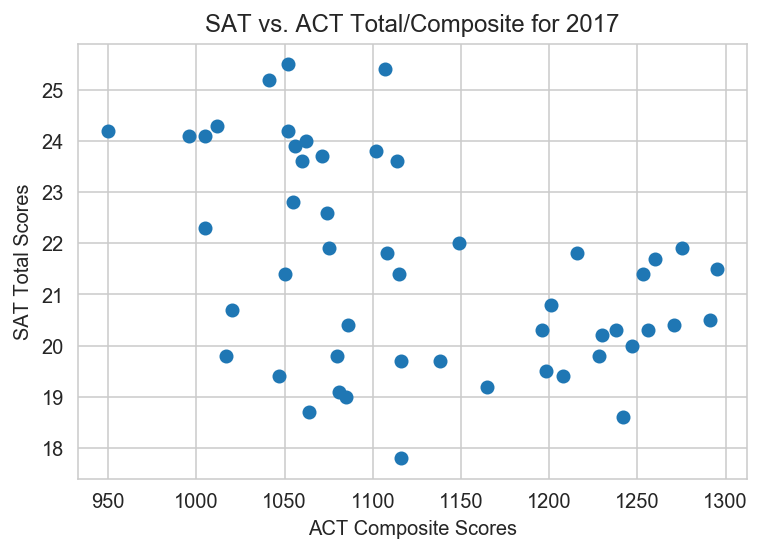

In [291]:
# Code
plt.scatter(final['total_sat_2017'],final['composite_act_2017'])
plt.title('SAT vs. ACT Total/Composite for 2017')
plt.xlabel('ACT Composite Scores')
plt.ylabel('SAT Total Scores')

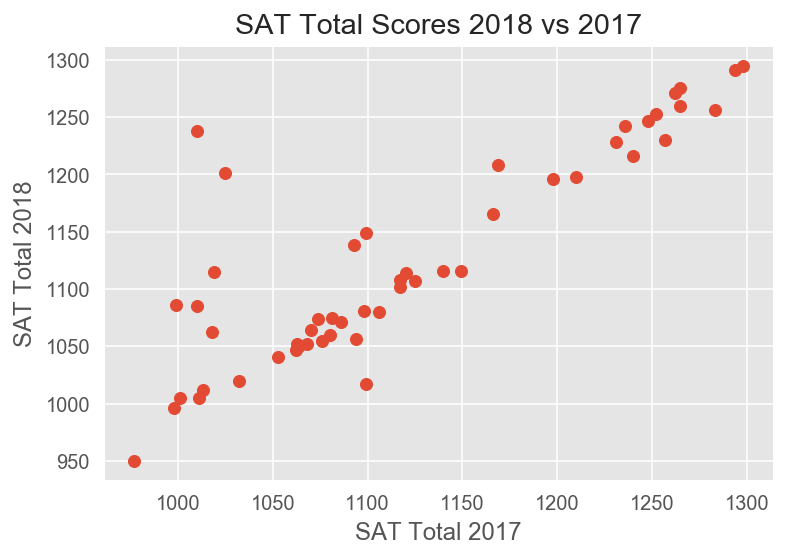

In [418]:
# Code
plt.scatter(final['total_sat_2018'],final['total_sat_2017'])
plt.title('SAT Total Scores 2018 vs 2017')
plt.xlabel('SAT Total 2017')
plt.ylabel('SAT Total 2018')
plt.savefig('sat_totl.png')

Text(0, 0.5, 'ACT Composite Scores 2018')

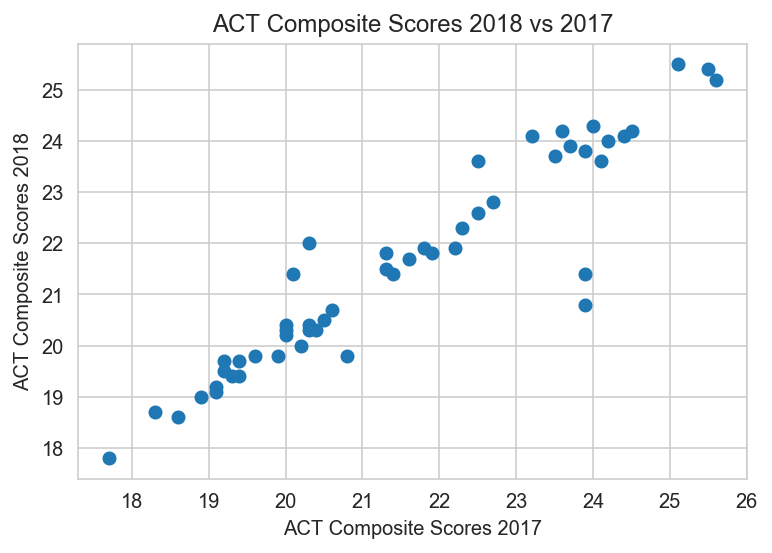

In [294]:
# Code
plt.scatter(final['composite_act_2018'],final['composite_act_2017'])
plt.title('ACT Composite Scores 2018 vs 2017')
plt.xlabel('ACT Composite Scores 2017')
plt.ylabel('ACT Composite Scores 2018')

#### Plot and interpret boxplots

For each numeric variable in the dataframe create a boxplot using Seaborn. Boxplots demonstrate central tendency and spread in variables. In a certain sense, these are somewhat redundant with histograms, but you may be better able to identify clear outliers or differences in IQR, etc.

Multiple values can be plotted to a single boxplot as long as they are of the same relative scale (meaning they have similar min/max values).

Each boxplot should:
- Only include variables of a similar scale
- Have clear labels for each variable
- Have appropriate titles and labels

In [ ]:
final.head(2)
final.set_index('state', inplace=True)

In [337]:
final.columns 

Index(['participation_act_2017', 'english_act_2017', 'math_act_2017',
       'reading_act_2017', 'science_act_2017', 'composite_act_2017',
       'participation_sat_2017', 'ebrw_sat_2017', 'math_sat_2017',
       'total_sat_2017', 'participation_act_2018', 'composite_act_2018',
       'english_act_2018', 'math_act_2018', 'reading_act_2018',
       'science_act_2018', 'participation_sat_2018', 'ebrw_sat_2018',
       'math_sat_2018', 'total_sat_2018'],
      dtype='object')

In [363]:
# Use list comprehension to extract the sat and act columns - Scores only
# also create a list of participation col 

act_col = [col for col in final.columns if ('_act_' in col) & ('participation' not in col)]
sat_col = [col for col in final.columns if ('_sat_' in col) & ('participation' not in col)]
participation_col = [col for col in final.columns if 'participation' in col]
act_col

['english_act_2017',
 'math_act_2017',
 'reading_act_2017',
 'science_act_2017',
 'composite_act_2017',
 'composite_act_2018',
 'english_act_2018',
 'math_act_2018',
 'reading_act_2018',
 'science_act_2018']

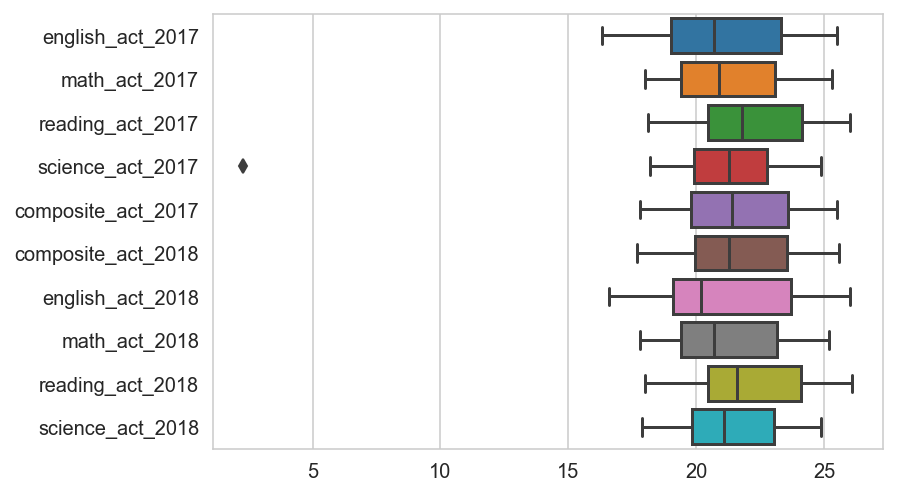

In [344]:
# boxplot for ACT scores
g=sns.boxplot(data=final[act_col],orient='h')

There is an outlier from science_act_2017, which is Maryland (2.3)

In [342]:
final['science_act_2017'].sort_values()[0:3]

state
Maryland        2.3
Nevada         18.2
Mississippi    18.8
Name: science_act_2017, dtype: float64

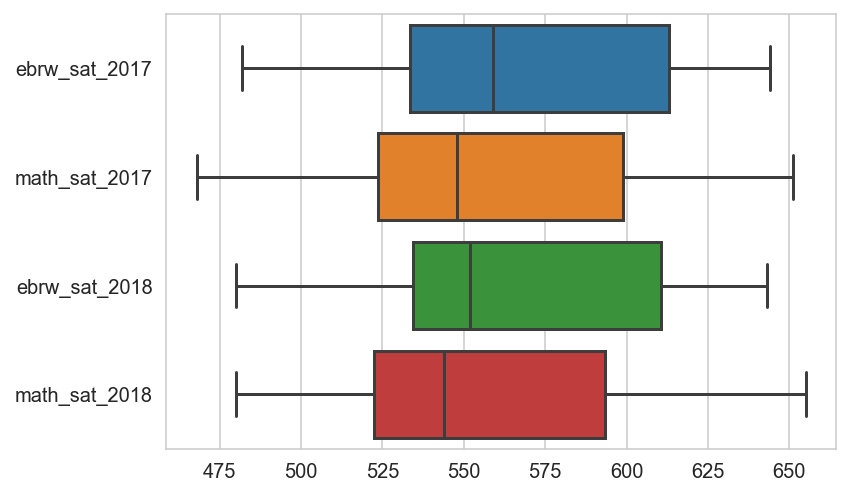

In [335]:
# boxploat for sat subject scores
sns.boxplot(data=final[['ebrw_sat_2017','math_sat_2017','ebrw_sat_2018','math_sat_2018']],orient='h')

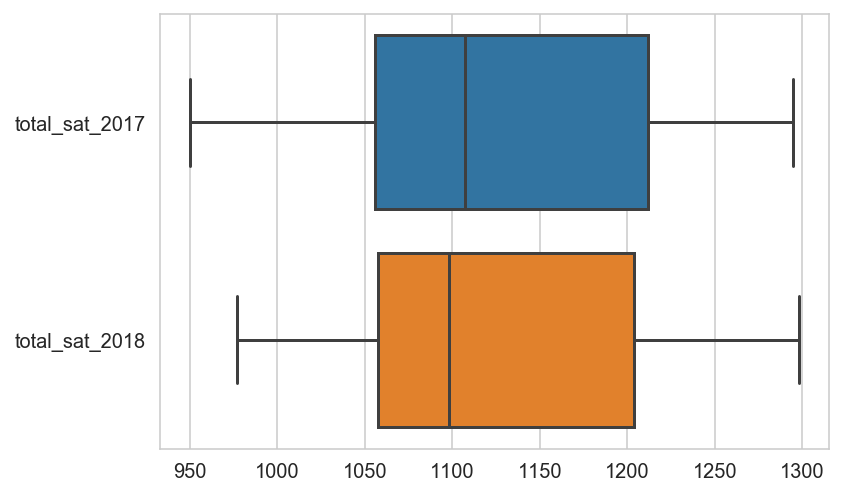

In [336]:
# Code
sns.boxplot(data=final[['total_sat_2017','total_sat_2018']],orient='h')

#### Feel free to do additional plots below
*(do research and choose your own chart types & variables)*

Are there any additional trends or relationships you haven't explored? Was there something interesting you saw that you'd like to dive further into? It's likely that there are a few more plots you might want to generate to support your narrative and recommendations that you are building toward. **As always, make sure you're interpreting your plots as you go**.

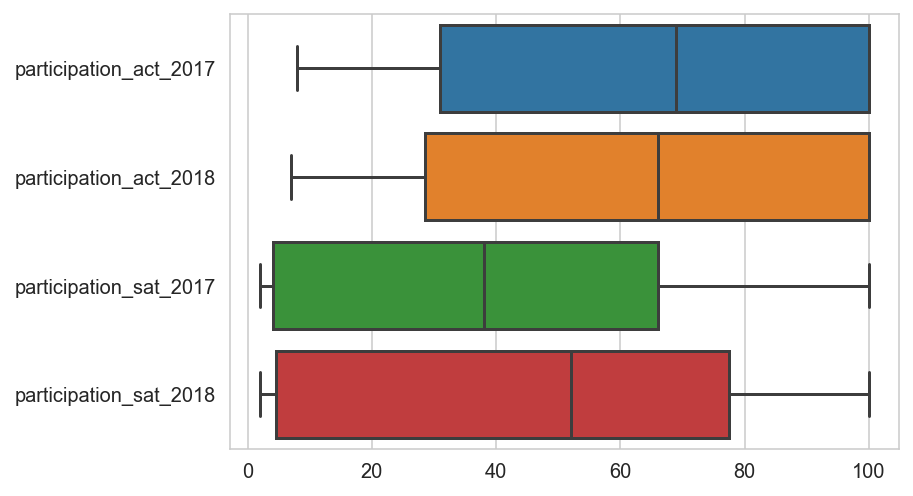

In [350]:
# participation boxplot

sns.boxplot(data=final[participation_col],orient='h',order=['participation_act_2017','participation_act_2018','participation_sat_2017','participation_sat_2018'])

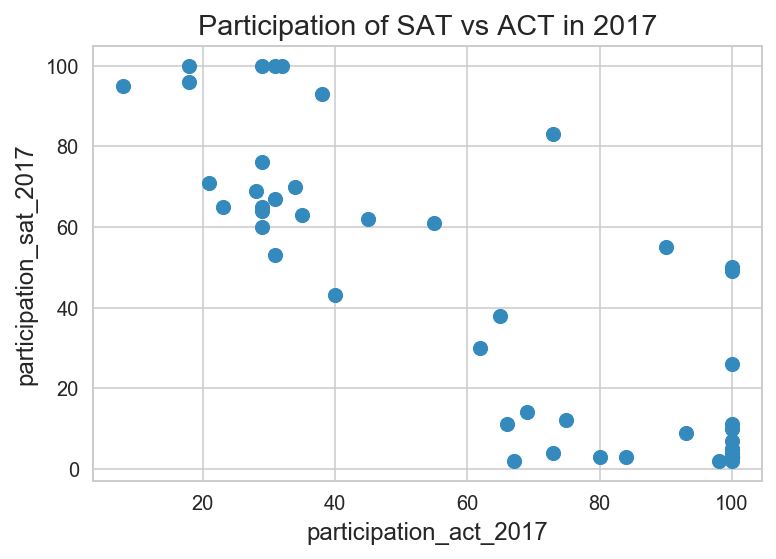

In [511]:
final.plot(x='participation_act_2017',y='participation_sat_2017',
           title = 'Participation of SAT vs ACT in 2017', kind='scatter',s=50)
#plt.vlines(x=50,ymin=0, ymax=105,linestyle = 'dotted',color = 'g')
#plt.hlines(y=50,xmin=0,xmax=105,linestyle = 'dotted',color = 'g')
plt.savefig('sat_act_rate_2017.png')

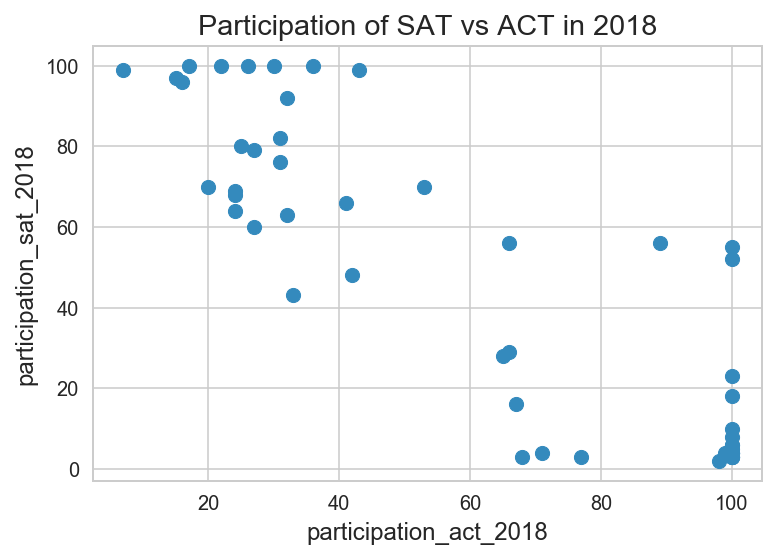

In [513]:
final.plot(x='participation_act_2018',y='participation_sat_2018',
           title = 'Participation of SAT vs ACT in 2018', kind='scatter',s=50)
#plt.vlines(x=50,ymin=0, ymax=105,linestyle = 'dotted',color = 'r')
#plt.hlines(y=50,xmin=0,xmax=105,linestyle = 'dotted',color = 'r')
plt.savefig('sat_act_rate_2018.png')

In [388]:
participation_col

['participation_act_2017',
 'participation_sat_2017',
 'participation_act_2018',
 'participation_sat_2018']

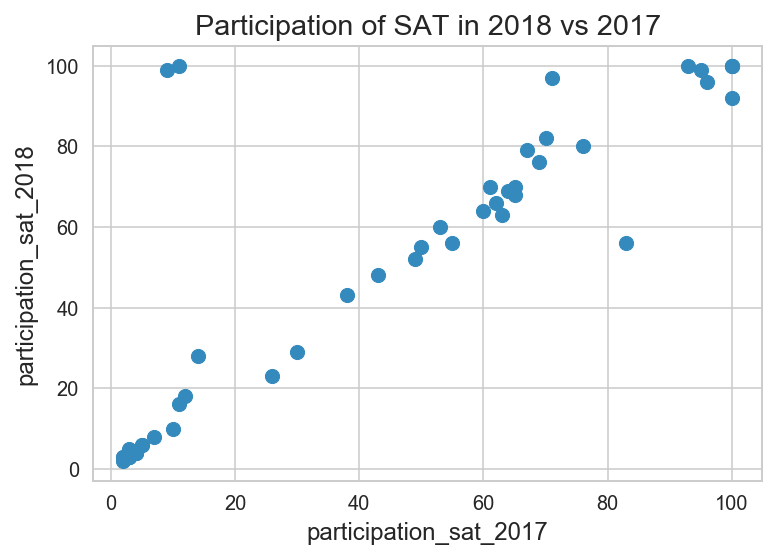

In [500]:
final.plot(x='participation_sat_2017',y='participation_sat_2018',
           title = 'Participation of SAT in 2018 vs 2017', kind='scatter',s=50)
#plt.vlines(x=50,ymin=0, ymax=105,linestyle = 'dotted',color = 'r')
#plt.hlines(y=50,xmin=0,xmax=105,linestyle = 'dotted',color = 'r')

plt.savefig('sat_participation_comp.png')

Colorado and Illinios's SAT participation rate jumped to 100% in 2018

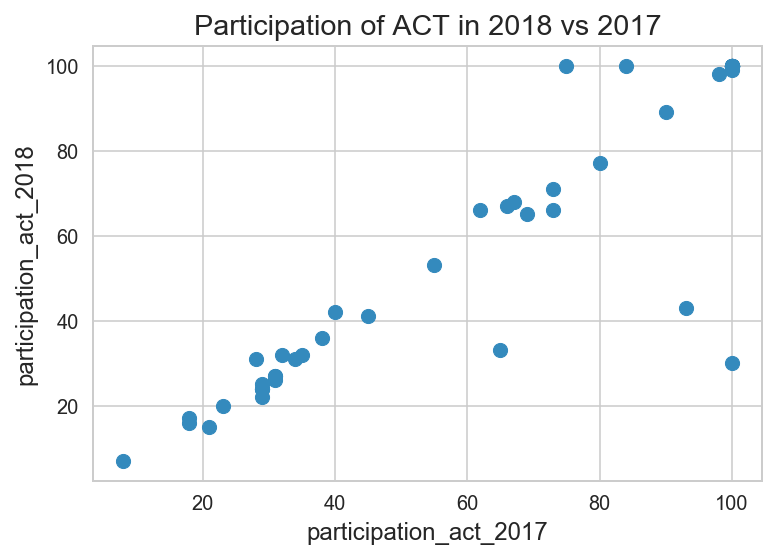

In [499]:
final.plot(x='participation_act_2017',y='participation_act_2018',
           title = 'Participation of ACT in 2018 vs 2017', kind='scatter',s=50)
#plt.vlines(x=50,ymin=0, ymax=105,linestyle = 'dotted',color = 'r')
#plt.hlines(y=50,xmin=0,xmax=105,linestyle = 'dotted',color = 'r')

plt.savefig('act_participation_comp.png')

    total_sat_2018  composite_act_2018
15            1265                21.8


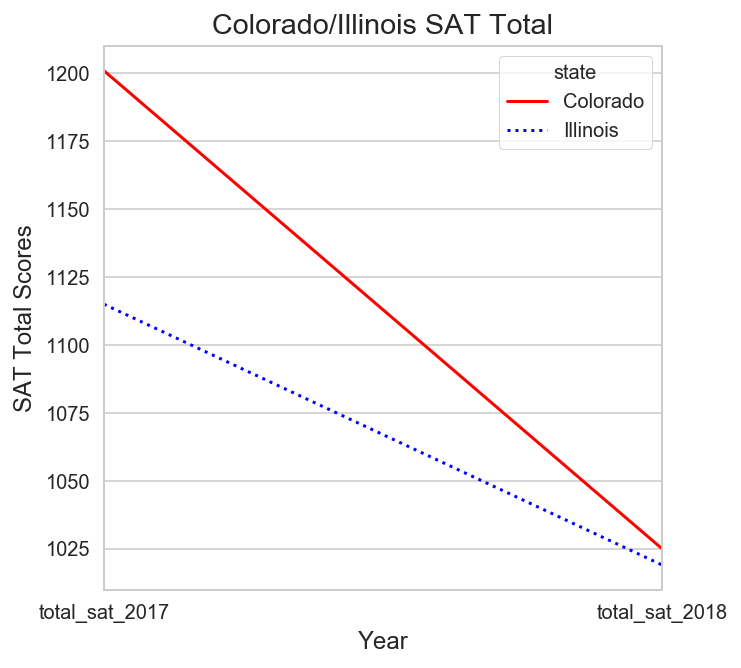

In [662]:
# look at Iowa state's scores
iowa = final.loc[final['state']=='Iowa',:][['total_sat_2018','composite_act_2018']]
print(iowa)

iowa.iloc[0,1]
iowa.iloc[0,0]

# look at Colorado/Illinois state's scores
co_il = final.loc[(final['state']=='Colorado')|(final['state']=='Illinois'),:][['state','total_sat_2017','total_sat_2018']]
co_il=co_il.set_index('state')
co_il.T.plot(style={'Colorado':'r', 'Illinois':':b'},xticks=[0,1], figsize=(5,5))
plt.title('Colorado/Illinois SAT Total')
plt.xlabel('Year')
plt.ylabel('SAT Total Scores')
plt.savefig('sat_co_il_ttl.png')

SAT scores of both states declined when participation rised to 100%.  

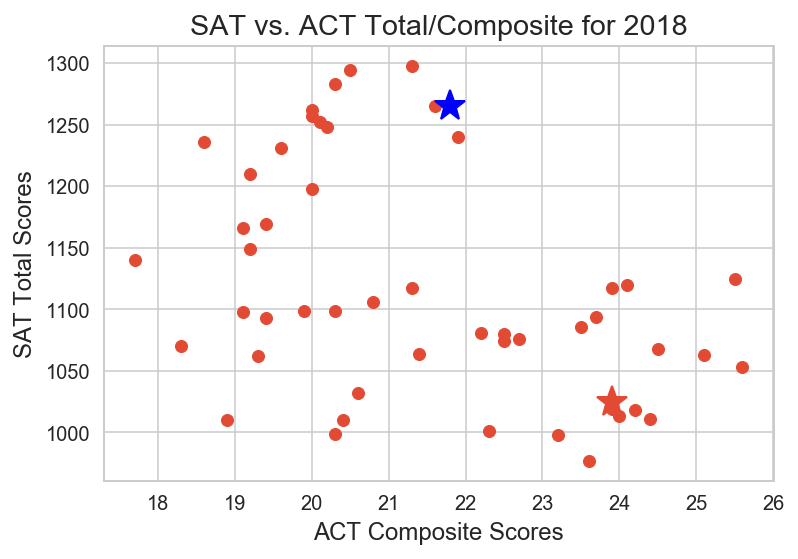

In [566]:
plt.scatter(final['composite_act_2018'],final['total_sat_2018'])
plt.plot(iowa.iloc[0,1],iowa.iloc[0,0],'b*', ms=16)  # highlight IOWA's score on the graph
#plt.plot(colorado.iloc[0,1],colorado.iloc[0,0],'*', ms=16)  # highlight IOWA's score on the graph
plt.title('SAT vs. ACT Total/Composite for 2018')
plt.xlabel('ACT Composite Scores')
plt.ylabel('SAT Total Scores')

plt.savefig('sat_act_totl_2018.png')

#### (Optional): Using Tableau, create a choropleth map for each variable using a map of the US. 

Save this plot as an image file in an images directory, provide a relative path, and insert the image into notebook in markdown.

## Descriptive and Inferential Statistics

#### Summarizing Distributions

Above, we used pandas `describe` to provide quick summary statistics of our numeric columns. We also demonstrated many visual relationships.

As data scientists, having a complete understanding of data is imperative prior to modeling.

While we will continue to build our analytic tools, we know that measures of *central tendency*, *spread*, and *shape/skewness* provide a quick summary of distributions.

For each variable in your data, summarize the underlying distributions (in words & statistics)
 - Be thorough in your verbal description of these distributions.
 - Be sure to back up these summaries with statistics.

Answers:

participation_act 2017 and 2018: is left skewed, with two spikes at 30% range and 100%
2017 ACT test: english, math and reading's distribution is random, spread is fairly tight, in the range of (16,26)
2017 ACT Science test has an outlier at 2.3 (Maryland) that skewed the distribution to the left
2018 ACT tests: all four tests have tight spread, results are in the rage of (16,27)

Participation of SAT in 2017 and 2018: both are right skewed, with at least 10 states belong 10%
SAT EBRW test in 2017 and 2018: both are similar, randomly distributed in (480,644)
SAT Math test in 2017: seems to centered at 525 and skewed right
SAT Math test in 2018: spread in the range of (480,655)

In [392]:
final.describe()

,participation_act_2017,english_act_2017,math_act_2017,reading_act_2017,science_act_2017,composite_act_2017,participation_sat_2017,ebrw_sat_2017,math_sat_2017,total_sat_2017,participation_act_2018,composite_act_2018,english_act_2018,math_act_2018,reading_act_2018,science_act_2018,participation_sat_2018,ebrw_sat_2018,math_sat_2018,total_sat_2018
count,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000
mean,65.254902,20.931373,21.182353,22.013725,21.041176,21.519608,39.803922,569.117647,556.882353,1126.098039,61.647059,21.486275,20.988235,21.125490,22.015686,21.345098,45.745098,563.686275,556.235294,1120.019608
std,32.140842,2.353677,1.981989,2.067271,3.182463,2.020695,35.276632,45.666901,47.121395,92.494812,34.080976,2.106278,2.446356,2.035765,2.167245,1.870114,37.314256,47.502627,47.772623,94.155083
min,8.000000,16.300000,18.000000,18.100000,2.300000,17.800000,2.000000,482.000000,468.000000,950.000000,7.000000,17.700000,16.600000,17.800000,18.000000,17.900000,2.000000,480.000000,480.000000,977.000000
25%,31.000000,19.000000,19.400000,20.450000,19.900000,19.800000,4.000000,533.500000,523.500000,1055.500000,28.500000,19.950000,19.100000,19.400000,20.450000,19.850000,4.500000,534.500000,522.500000,1057.500000
50%,69.000000,20.700000,20.900000,21.800000,21.300000,21.400000,38.000000,559.000000,548.000000,1107.000000,66.000000,21.300000,20.200000,20.700000,21.600000,21.100000,52.000000,552.000000,544.000000,1098.000000
75%,100.000000,23.300000,23.100000,24.150000,22.750000,23.600000,66.000000,613.000000,599.000000,1212.000000,100.000000,23.550000,23.700000,23.150000,24.100000,23.050000,77.500000,610.500000,593.500000,1204.000000
max,100.000000,25.500000,25.300000,26.000000,24.900000,25.500000,100.000000,644.000000,651.000000,1295.000000,100.000000,25.600000,26.000000,25.200000,26.100000,24.900000,100.000000,643.000000,655.000000,1298.000000


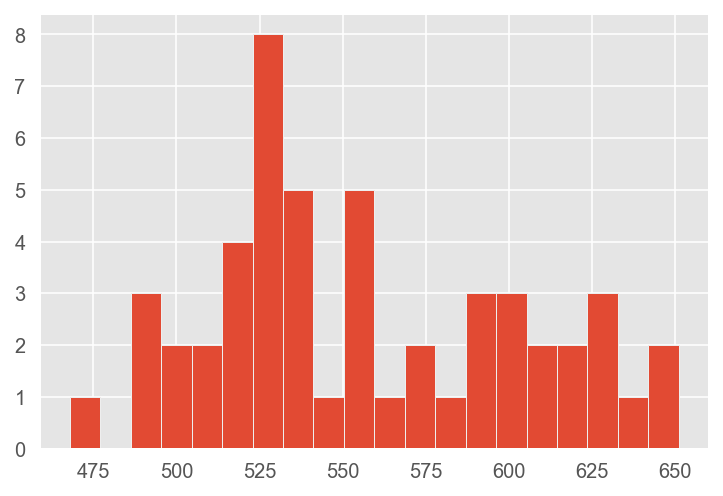

In [417]:
final['math_sat_2017'].hist(bins=20)

#### We generally assuming that data we sample from a population will be normally distributed. Do we observe this trend?

Answer: No, we don't see the normal distribution.

Does This Assumption Hold for:
    - Math
    - Reading
    - Rates
Explain your answers for each distribution and how you think this will affect estimates made from these data.

Answer:  The assumption doesn't hol for any of three distribution above.  The estimate made from these data would not be accurate with relation to the population parameters.

The samples (data formation) are biased as there are a number of states who mandates the students to take either SAT or ACT tests statewise.  This policy breaks the requirement of "randomly selected samples", hence you can see participation rate is heavily skewed towards one side.

The number of sample is not high enough, although SAT math scores in 2017 kind of resembles a normal distribution (centered at 525), but the distribution is not significant enough to tell it's a normal one.

#### Estimate Limits of Data

Suppose we only seek to understand the relationship between SAT and ACT participation rates in 2017. 

##### Does it make sense to conduct statistical inference given these data specifically? 

Why or why not?

*(think about granularity, aggregation, the relationships between populations size & rates...consider the actually populations these data describe in answering this question)*

Answer:

No, it doesn't make senses to conduct inference.

To conduct statistical inference, we need additional information.  We only have the state means for each test, we have no idea on the number of students who've taken the test, or their respective score, or the standard deviation of the scores.  

##### Is it appropriate to compare *these* specific SAT and ACT math scores? 

Why or why not?

Answer:

No, it's not appropriate to make comparision about the two math results.

First of all, these two tests are prepared by two separate boards, they assess different information and skills. The ACT tests students on subject matter covered in high school courses. On the other hand, the SAT was designed as an aptitude test that measures reasoning, critical thinking and verbal abilities. Hence you can really compare SAT verses ACT in general.

Also the math tests are structured differently.  SAT's math has two parts, one of which is unique to SAT - No calculator setion.  This section requires students to solve the problem without a calculator.  Students who aren't good at that will not fair well in this section.

#### Statistical Evaluation of Distributions 

**If you feel it's appropriate**, using methods we discussed in class, run hypothesis tests to compare variables of interest in our dataset. 

In [ ]:
# Code:

## Outside Research

Based upon your observations, choose **three** states that demonstrate interesting trends in their SAT and/or ACT participation rates. Spend some time doing outside research on state policies that might influence these rates, and summarize your findings below. **Feel free to go back and create new plots that highlight these states of interest**. If you bring in any outside tables or charts, make sure you are explicit about having borrowed them. If you quote any text, make sure that it renders as being quoted. (Make sure that you cite your sources -- check with you local instructor for citation preferences).

Colorado and Illinios have significant jump in their participation in SAT, due to statewise implementation of SAT in April 2017

West Virginia's SAT participation doubled in 2018, increased from 14% to 28%.  Need further research to understand increase.

## Conclusions and Recommendations

Based on your exploration of the data, what are you key takeaways and recommendations? Choose one state with a lower participation rate and provide a suggestion for how the College Board might increase participation amongst graduating seniors in this state. Are there additional data you desire that would better inform your investigations?

In [ ]:
SAT and ACT are two widely accepted tests for college admission.  Certain states have 100% participation rate in either SAT or ACT test.
SAT tests are gaining recognition as more states are accepting it as the compulsory test for high school graduands.


